<span class="mathmacros" style="display:none;">
$\def\bra#1{\mathinner{\langle{#1}|}}
\def\ket#1{\mathinner{|{#1}\rangle}}
\def\braket#1{\mathinner{\langle{#1}\rangle}}
\newcommand{\mdef}{\overset{\mathrm{def}}{=}}
\newcommand{\bm}{\mathbf}
\newcommand{\inv}[1]{#1^{-1}}   % Inverse Matrix
\newcommand{\invt}[1]{#1^{-T}}  % Inverse Transposed Matrix
\renewcommand{\nl}{\\&\phantom{{}={}}}% Newline In aligned equations
\newcommand{\pfr}[2]{\frac{\pp #1}{\pp #2}}      % Partial derivative
\newcommand{\dfr}[2]{\frac{\dd #1}{\dd #2}}      % Total derivative
\newcommand{\pp}{\partial}
\DeclareMathOperator{\Var}{Var}
\DeclareMathOperator{\det}{det}
\DeclareMathOperator{\tr}{tr}
\DeclareMathOperator{\sgn}{sgn}
\DeclareMathOperator{\adj}{adj}
\DeclareMathOperator{\ii}{i}
\DeclareMathOperator{\dd}{d}
\DeclareMathOperator{\rhs}{RHS}
\DeclareMathOperator{\lhs}{LHS}
\newcommand{\nl}{\\&\phantom{={}}}
\DeclareMathOperator{\E}{E}
\DeclareMathOperator{\Cov}{Cov}
\DeclareMathOperator{\Beta}{B}
\DeclareMathOperator{\Bdist}{Beta}$
</span>

+ Use D=2?4?
+ Average for level spacing, and overlap different size to see transition
+ 

+ XZZ: compare large delta vs small delta(ETH)
+ Where is the transition:
    1. ED: use [energy spacing](transition.ipynb) to figure out transition point delta
        + About $0.5\sim0.1$
    1. Pick two typical deltas
        + $\Delta = 0.2, 2$
    1. ED data, plot $|n^i|^2$ as function of length. Smooth.
        + Smoothed by fitting using 2nd order polynomial function. Outliers has some effect. Need to change cost function? 
        + Exp decrease for ETH. (Slower than?) $2^{-L}$
        + Constant for MBL
    1. Similar for local/global optimization. versus depth for local and length for global
        + Compare: Are large depth configurations close to global one.
        + Diagonal elements vesus depth for delta=0.2 and 16
            + $D=2,4,6,8,\infty$
        + Global: Diagonal elements versus length 

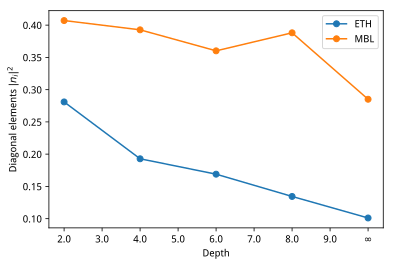

In [27]:
D = [2,4,6,8,10]
nm1 = [0.2809595310638791, 0.1928238794325375, 0.16895309745405013, 0.13444091593070745, 0.10106976607311215]
nm2 = [0.4070819251480712, 0.39271353838688056, 0.36016085096093753, 0.38812187339602205, 0.28509931706709674]
fig, ax=subplots()
ax.plot(D, nm1, 'o-', label='ETH');
ax.plot(D, nm2, 'o-', label='MBL');
ax.set_xlabel('Depth')
ax.set_ylabel(r'Diagonal elements $|n_i|^2$')
labels = ax.get_xticks().tolist()
labels[-2] = r'$\infty$'
legend();
ax.set_xticklabels(labels);


+ If we are looking for steady state, a pure state must be an eigenstate.
    + For ETH, this pure state have vol law entanglement.
    + For mixed state, steady state may have area law (e.g. Gibbs ensemble) even in the ETH


## TODO
### Low level
+ Do ED, explicity a diagonal matrix with various $N$ and classical $S$, turn them into MPOs, and check bond dimension.
+ Does the optimized $\rho$ always mean steady state?
    + For $\rho(\delta)=e^{i\delta}\rho_0 e^{-i\delta}$
$$\nabla_\delta\Var[H]=i[\rho_0, H^2-2\langle H\rangle H], \quad \langle H\rangle=\mathrm{tr}[H\rho_0]$$

### High level
+ Cleaner way to tell difference between ETH/MBL
    + Where is the direction? Could you explain?
+ Entanglement threshold (for density matrices) using finite depth circuit to generate a steady state.
    + What does entanglement threshold here mean?
    + For MPO, try two layers local optimization on about 8 sites first.

### Others
+ Try to minimize $\tr[(H-E_0)^2\rho]$
    + The optimization code for this routine is handy
    + Zero energy?

why is this useful for distinguishing MBL and thermalizing phases: fix E and the starting total entropy of the initial density matrices rho_0. For example, we could pick $\rho_0 = \prod_i (\alpha_i |up> + \sqrt{1-\alpha_i^2} |down>$ ) with alpha_i close to 0 or 1 on each site. In the ETH phase, the optimized density matrices must reproduce the same expectation value for local observables. In the MBL phase, we would hope to see a broader distribution of values for local observables determined by the z-product state with maximum weight in rho_0. The other thing we could do is monitor the depth of the circuit required for variance minimization as a function of the starting entropy. We expect that the smaller the starting entropy density, the larger the depth of the circuit. How should the depth scale with N for fixed entropy?

### Jan 24
+ Split chain into three parts and use different initial $\rho$, to change eigenvalues. The depth should be at least prop to length of chain.
+ Do the optimization code for $f=A_{\alpha\beta\gamma\delta}V_{\alpha\beta}V^+_{\gamma\delta}$
+ Do contraction of $f$ in the exact way

In [1]:
def s(p):
    p = [p, 1-p]
    return -dot(log(p), p)

In [7]:
s(0.02)

0.098039113279732

In [8]:
0.98**6

0.8858423808639999